# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Clean_Manual_DBSCAN_woFalseLabel_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['Type 1'].value_counts().index)
        counts = list(df_copy['Type 1'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    print("Number of Clusters:", c.size)
    c = malicious_df['cluster'].value_counts(ascending=True)
    print("Number of single-item Clusters:", c[c==1].count())
    print("Number of Samples Remaining:", malicious_df.shape[0])

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,6,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,8,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,9,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(40657, 6)

<Axes: ylabel='Type 1'>

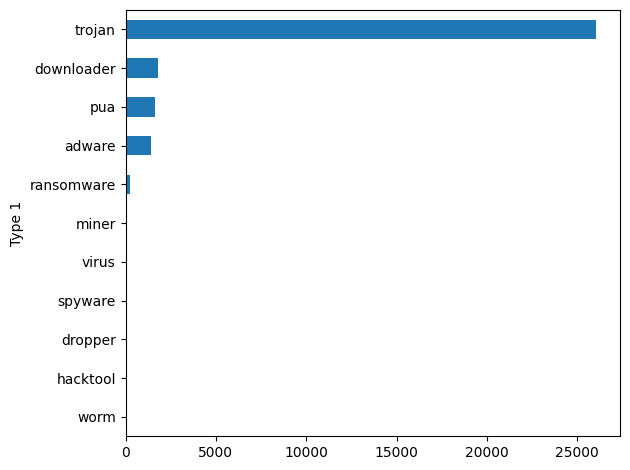

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [3]:
#INJECT PATTERN (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

print("Raw Clustered malicious samples")
how_many_clusters()

#DROP ROWS THAT ARE FALSELY LABELLED. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

print("After removing falsely labelled malicious samples")
how_many_clusters()

Raw Clustered malicious samples
Number of Clusters: 11740
Number of single-item Clusters: 9741
Number of Samples Remaining: 40657
After removing falsely labelled malicious samples
Number of Clusters: 11740
Number of single-item Clusters: 9741
Number of Samples Remaining: 40657


## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

Type 1
trojan        26066
downloader     1785
pua            1610
adware         1430
ransomware      268
miner           105
virus            54
spyware          38
hacktool          4
dropper           4
worm              1
Name: count, dtype: int64

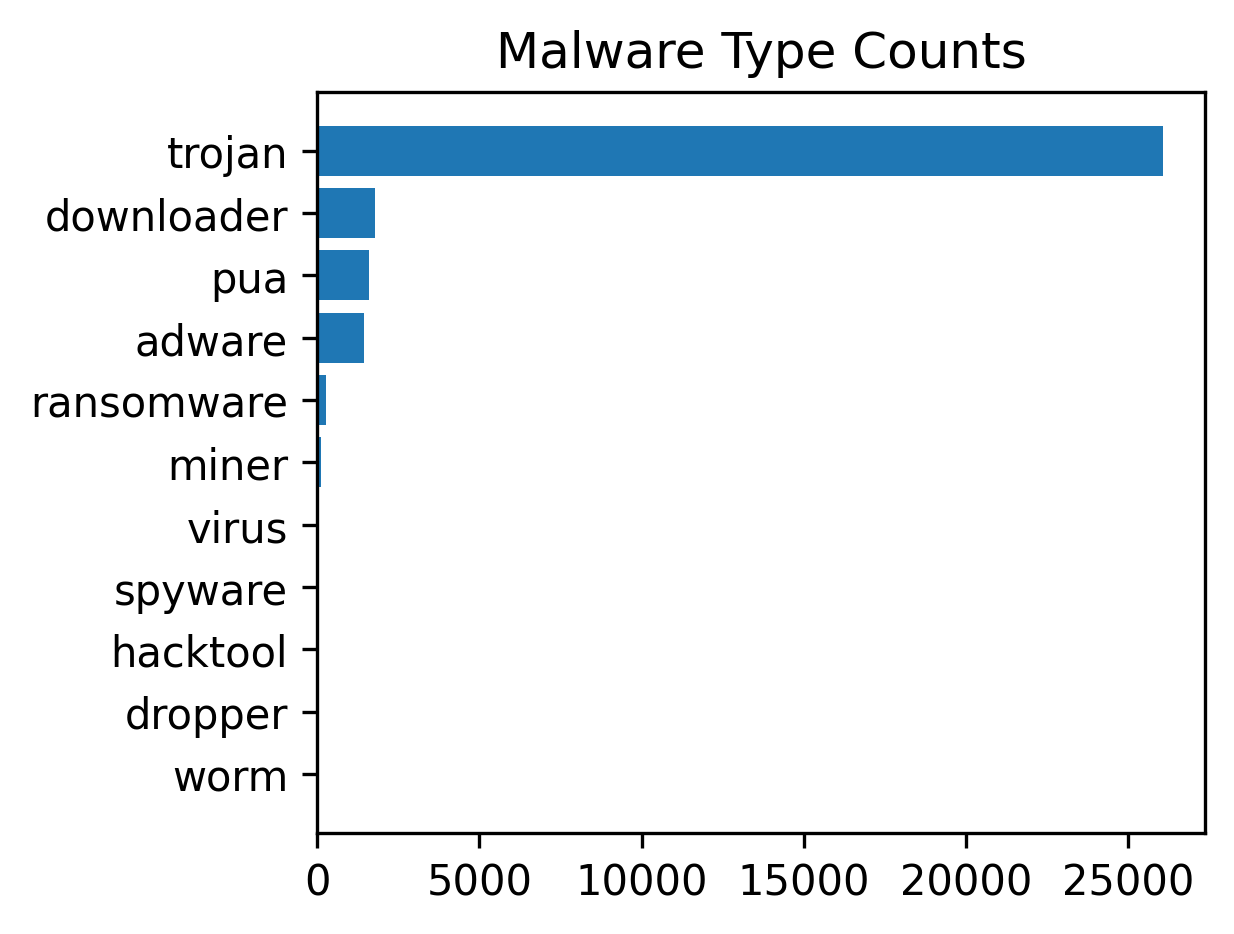

In [4]:
output = malicious_df['Type 1'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## How many clusters are there?

In [5]:
#Prior to noise removal

print("Prior to noise removal")
how_many_clusters()

Prior to noise removal
Number of Clusters: 11740
Number of single-item Clusters: 9741
Number of Samples Remaining: 40657


In [6]:
# DROP ROWS WITH NA TO HAVE CLEAN CLUSTERS
import numpy as nan
malicious_df.dropna(inplace=True, subset=['Type 1'])
malicious_df['Type 1'].unique()

# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT (i.e. NOISE)
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
# malicious_df.head()

print("After removing yet unlabelled malicious samples\n and clusters with more than 1 malware type")
how_many_clusters()

After removing yet unlabelled malicious samples
 and clusters with more than 1 malware type
Number of Clusters: 8746
Number of single-item Clusters: 7933
Number of Samples Remaining: 10247


In [7]:
# REMOVE SINGLE ITEM CLUSTERS
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if malicious_df[malicious_df['cluster'] == u].shape[0] == 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)

print("After removing single-item clusters")
how_many_clusters()

After removing single-item clusters
Number of Clusters: 813
Number of single-item Clusters: 0
Number of Samples Remaining: 2314


## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [8]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 11: trojan (6); 
CLUSTER 32: trojan (7); 
CLUSTER 40: trojan (2); 
CLUSTER 56: trojan (3); 
CLUSTER 63: trojan (3); 
CLUSTER 67: trojan (2); 
CLUSTER 69: trojan (3); 
CLUSTER 73: trojan (2); 
CLUSTER 85: trojan (3); 
CLUSTER 89: trojan (12); 
CLUSTER 93: trojan (13); 
CLUSTER 97: trojan (2); 
CLUSTER 98: trojan (2); 
CLUSTER 104: trojan (3); 
CLUSTER 115: trojan (5); 
CLUSTER 124: trojan (2); 
CLUSTER 139: trojan (3); 
CLUSTER 140: trojan (6); 
CLUSTER 142: trojan (10); 
CLUSTER 162: trojan (2); 
CLUSTER 172: trojan (3); 
CLUSTER 173: trojan (5); 
CLUSTER 179: trojan (2); 
CLUSTER 188: trojan (2); 
CLUSTER 190: trojan (11); 
CLUSTER 191: trojan (2); 
CLUSTER 194: trojan (3); 
CLUSTER 208: trojan (5); 
CLUSTER 213: trojan (2); 
CLUSTER 219: trojan (13); 
CLUSTER 232: trojan (11); 
CLUSTER 237: trojan (3); 
CLUSTER 247: trojan (3); 
CLUSTER 251: trojan (4); 
CLUSTER 255: trojan (4); 
CLUSTER 259: trojan (2); 
CLUSTER 262: trojan (2); 
CLUSTER 275: trojan (2); 
CLUSTER 281: trojan

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [9]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount_woNoise.csv", index=False)

# of Unique Malware Type: 3

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 807
Matching Clusters: [11, 40, 56, 63, 67, 69, 73, 85, 89, 93, 98, 104, 115, 124, 139, 140, 142, 162, 172, 173, 179, 188, 190, 191, 194, 208, 213, 219, 232, 237, 247, 251, 255, 259, 262, 275, 281, 289, 294, 310, 318, 326, 331, 334, 335, 343, 344, 347, 361, 363, 367, 369, 97, 373, 376, 383, 389, 400, 406, 422, 430, 452, 453, 456, 459, 463, 467, 469, 471, 473, 493, 499, 501, 508, 512, 516, 540, 548, 554, 557, 565, 571, 585, 586, 595, 596, 597, 603, 604, 609, 612, 613, 624, 645, 655, 660, 664, 667, 676, 686, 689, 693, 705, 712, 715, 720, 722, 733, 754, 760, 762, 763, 764, 767, 773, 774, 777, 779, 780, 784, 788, 792, 804, 810, 811, 812, 813, 814, 820, 826, 829, 833, 838, 841, 541, 855, 859, 866, 867, 871, 872, 873, 875, 881, 889, 899, 901, 902, 908, 912, 923, 947, 32, 970, 975, 976, 984, 987, 991, 997, 1006, 1017, 1019, 1023, 1035, 1041, 1043, 1047, 1049, 1050, 1065, 1066, 1080, 1086, 1088, 1

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
2,trojan,807,"[11, 40, 56, 63, 67, 69, 73, 85, 89, 93, 98, 1..."
1,downloader,5,"[999, 3119, 3850, 5500, 6391]"
0,adware,1,[882]


## "What the API Calls are in each Malware Type"

In [10]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}_woNoise.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               35968
LdrLoadDll                           17825
LdrGetDllHandle                      17029
NtClose                              12723
RegOpenKeyExW                        12549
NtAllocateVirtualMemory              12417
RegQueryValueExW                      9701
RegCloseKey                           8105
LoadResource                          7461
FindResourceExW                       6889
NtQueryValueKey                       5044
NtOpenKey                             4870
GetSystemTimeAsFileTime               4401
GetSystemMetrics                      4366
NtFreeVirtualMemory                   3405
NtProtectVirtualMemory                2735
NtDelayExecution                      2724
SetErrorMode                          2500
RegOpenKeyExA                         2204
NtReadFile                            1943
NtCreateFile                          1922
SetUnhandledExceptionFilter           1771
GetFileSize                           1760
NtDe

downloader
LdrGetProcedureAddress               92
NtClose                              86
NtOpenKey                            70
NtQueryInformationFile               58
GetFileInformationByHandle           56
NtQuerySystemInformation             56
LoadResource                         54
NtOpenFile                           54
FindResourceExW                      54
NtAllocateVirtualMemory              42
LdrLoadDll                           42
LdrGetDllHandle                      38
RegOpenKeyExW                        32
RegCloseKey                          32
RegQueryValueExW                     24
GetSystemMetrics                     24
NtQueryValueKey                      16
NtDelayExecution                     12
GetCursorPos                         12
SetErrorMode                         12
RegOpenKeyExA                        12
NtMapViewOfSection                   10
LoadStringA                           8
GetFileAttributesW                    8
NtCreateSection              

adware
LdrGetProcedureAddress         54
LdrLoadDll                     36
LdrGetDllHandle                10
NtAllocateVirtualMemory        10
GetSystemInfo                   8
GetSystemTimeAsFileTime         6
RegCloseKey                     6
GetSystemMetrics                6
RegOpenKeyExW                   6
RegQueryValueExW                4
RegOpenKeyExA                   4
DrawTextExW                     4
NtClose                         4
NtDuplicateObject               4
SetUnhandledExceptionFilter     4
GetFileType                     4
NtCreateThreadEx                2
CryptDecrypt                    2
CryptAcquireContextW            2
CreateThread                    2
GetUserNameW                    2
NtFreeVirtualMemory             2
WSAStartup                      2
CoInitializeEx                  2
GetSystemDirectoryW             2
RegQueryValueExA                2
NtOpenDirectoryObject           2
CreateActCtxW                   2
GetSystemWindowsDirectoryW      2
NtProte

## "What the Unique API Calls are in each Malware Type"

In [11]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['NtCreateMutant', 'NtOpenKeyEx', 'GetForegroundWindow', 'ReadProcessMemory', 'RegCreateKeyExA', 'RegSetValueExA', 'OpenSCManagerA', 'OpenServiceA', 'StartServiceA', 'GetComputerNameW', 'FindFirstFileExW', 'OpenSCManagerW', 'OpenServiceW', 'GlobalMemoryStatusEx', 'LdrUnloadDll', 'NtOpenProcess', 'CryptCreateHash', 'CryptHashData', 'NtReadFile', 'UuidCreate', 'RegCreateKeyExW', 'RegSetValueExW', 'CoCreateInstance', 'FindResourceW', 'SizeofResource', 'RegQueryInfoKeyW', 'RegEnumKeyExW', 'EnumWindows', 'FindResourceA', 'FindResourceExA', 'LoadStringW', 'GetNativeSystemInfo', 'NtUnmapViewOfSection', 'GetFileVersionInfoSizeW', 'GetFileVersionInfoW', '__exception__', 'OutputDebugStringA', 'GetAdaptersAddresses', 'GetBestInterfaceEx', 'RegEnumValueW', 'CreateToolhelp32Snapshot', 'Process32FirstW', 'Process32NextW', 'NtTerminateProcess', 'NtTerminateThread', 'LookupAccountSidW', 'CoUninitialize', 'NtDeviceIoControlFile', 'MoveFileWithProgressW', 'LookupPrivilegeValueW', 'GetUserNameA'

## How many samples remaining?

In [12]:
print(f"{malicious_df.shape[0]}\n{malicious_df.shape[0]/42797*100:.4f}%")

2314
5.4069%


## What are the remaining clusters?

In [13]:
how_many_clusters()

Number of Clusters: 813
Number of single-item Clusters: 0
Number of Samples Remaining: 2314
